[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TariqAlhathloul/machine_learning_classification/blob/main/workspace/PCA.ipynb)


# **PCA**







## Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Step 2: Importing the data set

### Import the dataset and distributing the dataset into X and y components for data analysis.




In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)

In [3]:
df['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [4]:
X = df['data']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Step 4: Feature Scaling
### Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [6]:
sclaer = StandardScaler()

X_train = sclaer.fit_transform(X_train)

X_test = sclaer.transform(X_test)

## Step 5: Applying PCA function
### Applying the PCA function into the training and testing set for analysis.




In [7]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 6: Fitting Logistic Regression To the training set.

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

LogisticRegression()

## Step 7: Predicting the test set result

In [9]:
X_test_pred = log_reg.predict(X_test_pca)

In [10]:
accuracy = accuracy_score(X_test_pred, y_test)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 96.49%


## Step 8: Making the confusion matrix




In [11]:
conf_matrix = confusion_matrix(y_test, X_test_pred)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[37  2]
 [ 2 73]]


## Step 9: Predicting the training set result




## Step 10: Visualizing the Test set results




## function to plot the roc curve

In [12]:
tpr, fpr, thresholds = roc_curve(y_score=X_test_pred, y_true=y_test)

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

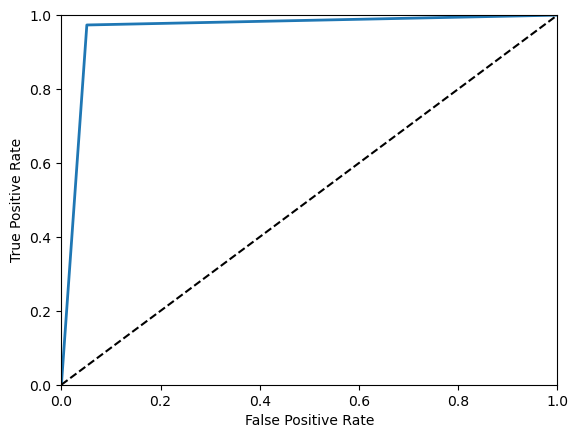

In [14]:
plot_roc_curve(tpr, fpr)
plt.show()

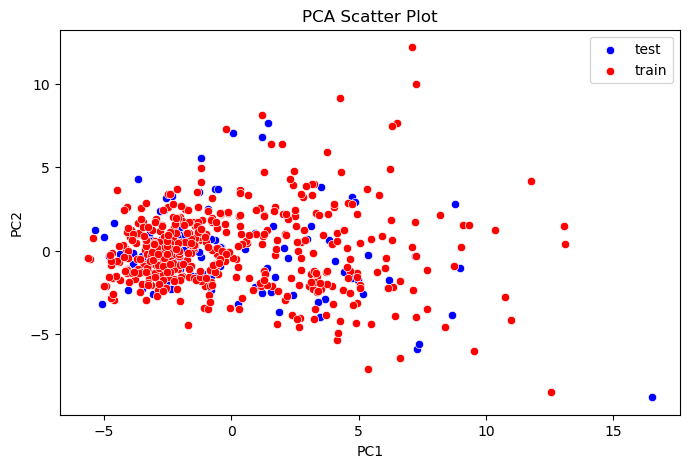

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x = X_test_pca[:,0], y=X_test_pca[:,1],label="test", marker='o', color='blue')
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], label='train', marker='o', color='red')

plt.title('PCA Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## **Well Done :)**
Now let's practice!